# Plots for the Teachable Robot Project

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pathlib
from matplotlib.pyplot import cm
import matplotlib.lines as mlines


In [315]:
data_dirs = [
    pathlib.Path('meta-mb-internal/data'),
    pathlib.Path('meta-mb-internal/old_data'),
    pathlib.Path('meta-mb-internal'),
]

def get_filenames(name):
    name = str(name)
    name_paths = []
    for data_dir in data_dirs:
        for exp_dir in data_dir.iterdir():
            if name in exp_dir.name:
                name_paths.append(exp_dir)
    return name_paths

def load_data(name, file_name='progress.csv'):
    name_paths = get_filenames(name)
    assert len(name_paths) > 0, "No files found with name " + name
    # check that they're all the same except the seed
    csv_datas = []
    for path in name_paths:
        assert path.name[:-1] == name_paths[0].name[:-1], f"Found multiple files with name {name}: {[path.name for path in name_paths]}"
        try:
            csv_name = path.joinpath(file_name)
            data = pd.read_csv(csv_name)
        except Exception as e:
            csv_name = path.joinpath('new_progress.csv')
            data = pd.read_csv(csv_name)
            
        # TODO: Remove this soon! There used to be a bug where if a run died TotalNumFeedback
        # would reset, but it's fixed. Once those old runs are irrelevant we can remove this.
        if 'Train/num_feedback_advice' in data.columns and 'Train/num_feedback_reward' in data.columns:
            timestep_feedback = data['Train/num_feedback_advice'] + data['Train/num_feedback_reward']
            full_feedback = np.cumsum(timestep_feedback)
            data['Train/NumFeedbackTotal'] = full_feedback
            
        csv_datas.append(data)
    return csv_datas

# NOTE: this is just here temporarily to make the csvs parsable b/c of a bug.
# The bug is fixed now, so once the current runs become unnecessary (or have all been fixed) we can delete this
def fix_csv(filename):
    data_folder = get_filenames(filename)[0]
    correct_data = []
    csv = data_folder.joinpath('progress.csv')
    new_csv = data_folder.joinpath('new_progress.csv')
    print(csv)
    with open(csv, 'r') as f:
        for line in f.readlines():
            if 'BufferSize' in line:
                correct_data = []
            correct_data.append(line)
    with open(new_csv, 'w') as f:
        f.writelines(correct_data)
            
# for num in range(551, 553):
#     fix_csv(num)
# # fix_csv(557)

# Claim 0: all forms of feedback help the agent learn more quickly (no distillation) than no teacher

This should be true, so long as the feedback contains any useful information.

### GOOD NEWS: All teachers outperform no teacher.

Subgoal can't get through the curriculum, but this isn't too bad news b/c we are able to ground Subgoals through bootstrapping (see claim 6).


In [331]:
x = np.arange(5) + .1
x[0] = np.nan
np.argwhere(~np.isnan(x))

array([[1],
       [2],
       [3],
       [4]])

In [339]:
def plot_curriculum(data_names, x_type, use_min_len=True):
    color = iter(cm.rainbow(np.linspace(0, 1, len(data_names))))
    legend = []
    legend_colors = []
    plots = []
    df_y_key = 'Curriculum Percent'
    if x_type == 'samples':
        x_label = 'Samples'
        df_x_key = 'Itr'
        title = 'Sample Efficiency'
    elif x_type == 'feedback':
        x_label = 'Num Feedback'
        df_x_key = 'Train/NumFeedbackTotal'
        title = 'Feedback Efficiency'
        
    for run_names, legend_name in data_names:
        try:
            data = [d for run_name in run_names for d in load_data(run_name)]

            cols = [df[df_y_key].to_numpy() for df in data]
            c = next(color)
            for i, run in enumerate(cols):
                x_val = data[i][df_x_key].to_numpy()
                good_indices = np.argwhere(~np.isnan(x_val))[:, 0]
                plt.plot(x_val[good_indices], run[good_indices], c=c)
            legend_line = mlines.Line2D([], [], color=c, label=legend_name)
            plots.append(legend_line)
        except Exception as e:
            print(e)
            print("couldn't plot " + legend_name)

    plt.title(title)
    plt.ylabel('Curriculum %')
    plt.xlabel(x_label)
    plt.legend(handles=plots)
    plt.show()


## Comparing the Feedback Efficiency of Different Teachers

Error tokenizing data. C error: Expected 65 fields in line 3, saw 77

Error tokenizing data. C error: Expected 65 fields in line 3, saw 77



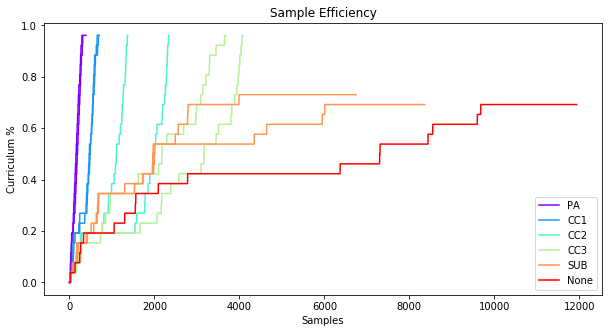

Error tokenizing data. C error: Expected 65 fields in line 3, saw 77

Error tokenizing data. C error: Expected 65 fields in line 3, saw 77



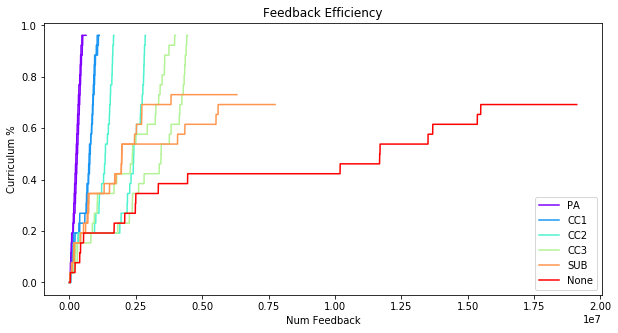

In [225]:
data_names = [
    (['0539', '0540'], 'PA'),
#     (['0577', '0578'], 'PA22'),
    (['0541', '0542'], 'CC1'),
    (['0543', '0544'], 'CC2'),
    (['0545', '0546'], 'CC3'),
    (['0547', '0548'], 'SUB'),
    (['0481'], 'None'),  # TODO: SWITCH THIS OUT FOR THE ONES ON C3!!!
]

plot_curriculum(data_names, 'samples')

plot_curriculum(data_names, 'feedback')

## How do we compare with the "best case" feedback efficiency (i.e. IL from oracle)

(Is this the best case? I'm assuming IL > RL, but maybe not always true?)

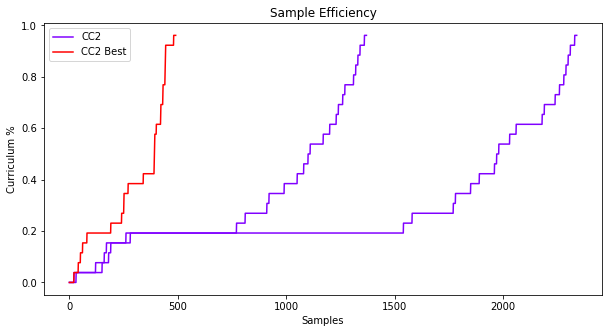

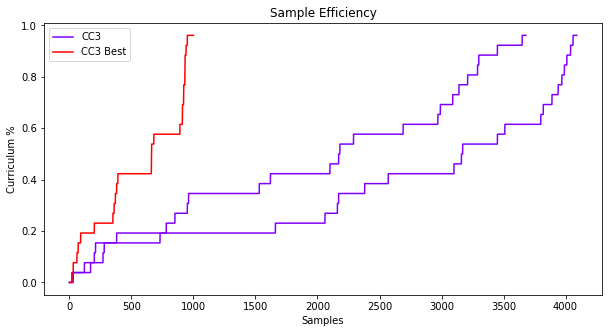

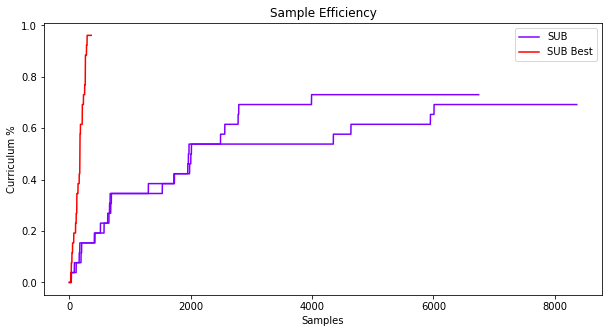

In [294]:
# NOTE: 'Best' runs didn't have the 10-rule, others did
data_names = [
    (['0543', '0544'], 'CC2'),
    (['0656'], 'CC2 Best'),
]
plot_curriculum(data_names, 'samples')

data_names = [
    (['0545', '0546'], 'CC3'),
    (['658'], 'CC3 Best'),
]
plot_curriculum(data_names, 'samples')

data_names = [
    (['0547', '0548'], 'SUB'),
    (['0660'], 'SUB Best'),
]
plot_curriculum(data_names, 'samples')

## No instr vs with instr

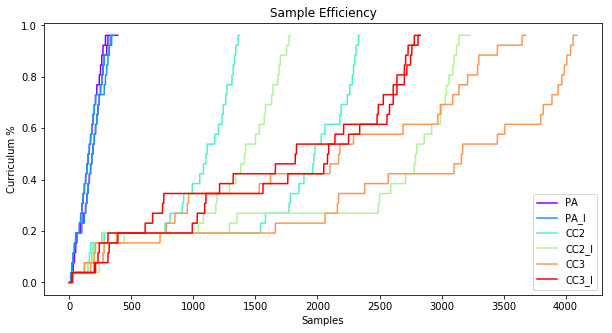

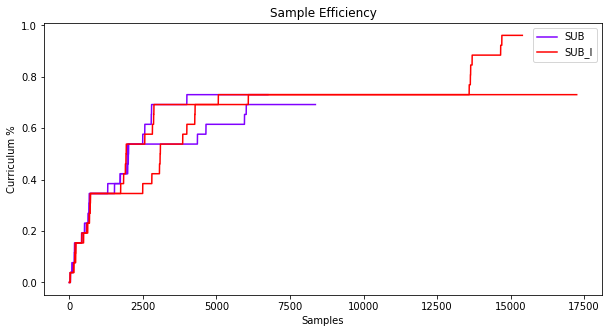

In [235]:
data_names = [
    (['0539', '0540'], 'PA'),
    (['0597', '0598'], 'PA_I'),
    (['0543', '0544'], 'CC2'),
    (['0579', '0580'], 'CC2_I'),
    (['0545', '0546'], 'CC3'),
    (['0581', '0582'], 'CC3_I'),
]

plot_curriculum(data_names, 'samples')


data_names = [
    (['0547', '0548'], 'SUB'),
    (['0599', '0600'], 'SUB_I'),
]

plot_curriculum(data_names, 'samples')

# Claim 1: all forms of feedback help the agent learn a policy which does NOT require feedback than no teacher

This should be true, so long as the agent actually completes the curriculum, since the version w/o teacher does not.

If this isn't true for certain higher-level teachers that's fine, so long as we are able to show that the problem is grounding, but once grounded it does work better.

### GOOD NEWS: All agents trained with feedback outperform no teacher.

### BAD NEWS: Agents trained with complex teachers have a hard time completing the curriculum.

Although interestingly, CC2 and Subgoal beat the level where they got stuck when trained with no teacher! Seems like the self-distillation process actually helped the policy.

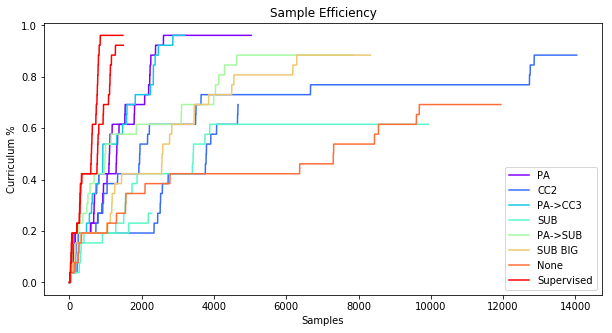

'Train/NumFeedbackTotal'
couldn't plot Supervised


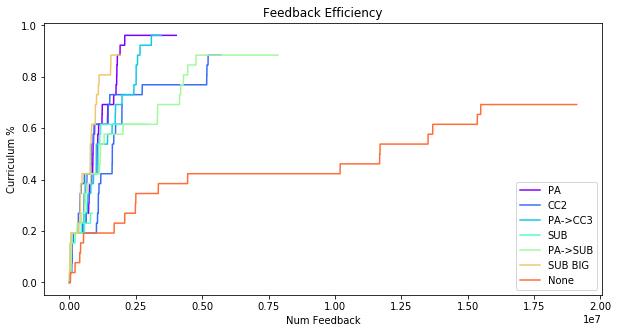

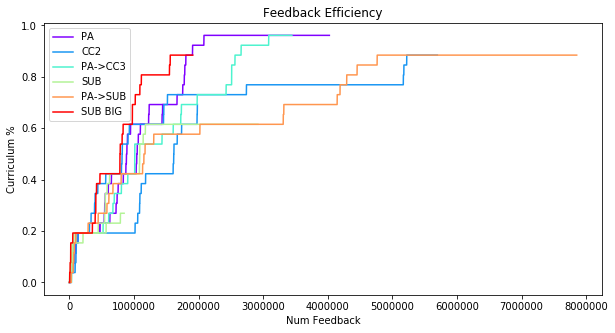

In [356]:
# OLD ENTROPY -seems to do better with .001
data_names = [  # TODO: re-run these 
    (['0627', '0628'], 'PA'),
#     (['0629', '0630'], 'CC1'),
    (['0631', '0632'], 'CC2'),
#     (['0633', '0634'], 'CC3'),
    (['0666'], 'PA->CC3'), # Add 667
    (['0635', '0636'], 'SUB'),
    (['0668'], 'PA->SUB'), # Add 669
    (['0664'], 'SUB BIG'),
    (['0481'], 'None'),
    (['0623', '0624'], 'Supervised'),
]
plot_curriculum(data_names, 'samples')
plot_curriculum(data_names, 'feedback')
data_names = data_names[:-2]
# Same as before, but no None so it rescales
plot_curriculum(data_names, 'feedback')
# TODO: plot TotalNumFeedback during collection so we get it even when doing supervised runs

# Claim 2: Policies conditioned on feedback can generalize zero-shot (or few-shot) to performing new tasks with the teacher.
(The new levels should not have any new feedback vocabulary.)

### GOOD NEWS: all the teachers outperform not having a teacher
### BAD NEWS: the higher-level teachers are way worse than the easy teacher... we should find a way to learn those better.


In [210]:
def plot_final_generalization(runs, title):
    legend_list = []
    env_names = None
    env_dict = {}
    for run_names, legend_name in runs:
        try:
            data = []
            for run_name in run_names:
                data += load_data(run_name, file_name='results.csv')
            if env_names is None:
                env_names = data[0][' env'].to_numpy()
                env_dict = {env_name: ([],[]) for env_name in env_names}
            success = [df['success_rate'].to_numpy() for df in data]
            for i, (env_name, (mean_list, std_list)) in enumerate(env_dict.items()):
                mean_list.append(np.mean([s[i].item() for s in success]))
                std_list.append(np.std([s[i].item() for s in success]))
            legend_list.append(legend_name)
        except Exception as e:
            print("Error on ", run_names, e)
                                
    for env_name, (mean_list, std_list) in env_dict.items():
        plt.title(title + ' - ' + env_name)
        plt.bar(legend_list, mean_list, yerr=std_list, capsize=5)
        plt.show()
                    


CURRENT PROBLEMS

PA - Teacher itself is failing??

CC1 - Beautiful and awesome. Unclear why it doesn't run into the same problems as PA

CC2 - can't open doors??

CC3 - wanders randomly

CC4 - wanders randomly/spins in circles

SUB - spins in circles

NONE - A bit of wandering, but also doesn't want to open doors.

TODO: check existing door levels in the train set. Maybe it just forgot them and we need curriculum smoothing?



In [24]:
plt.rcParams['figure.figsize'] = [10, 5]

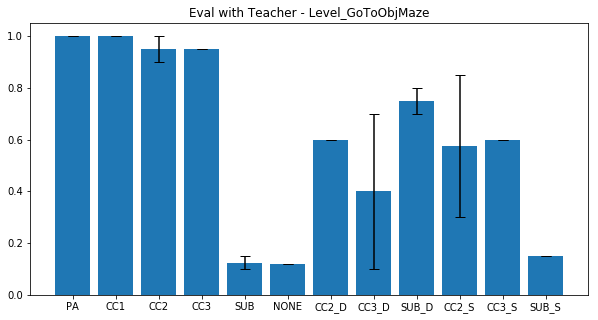

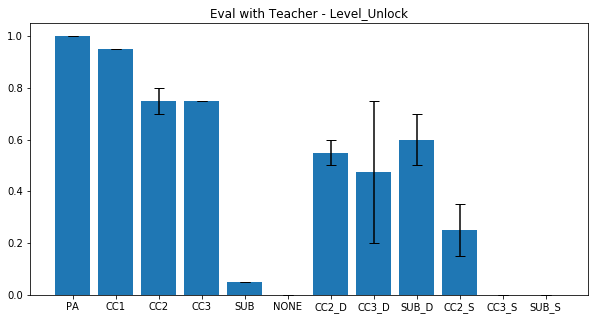

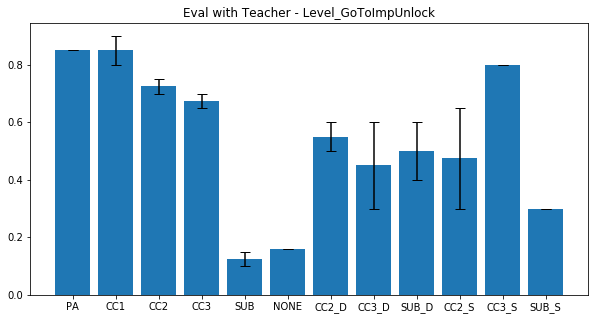

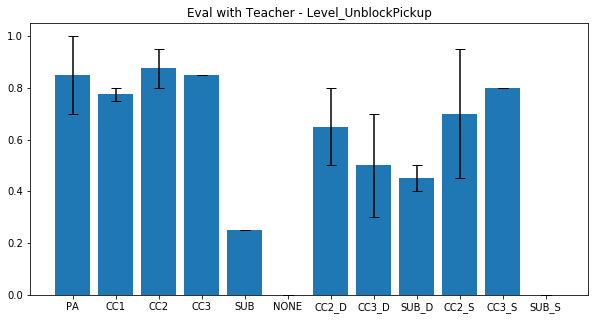

In [211]:
runs = [
    (['EVAL_539', 'EVAL_540'], 'PA'),
    (['EVAL_541', 'EVAL_542'], 'CC1'),
    (['EVAL_543', 'EVAL_544'], 'CC2'),
    (['EVAL_545', 'EVAL_546'], 'CC3'),
    (['EVAL_547', 'EVAL_548'], 'SUB'),
    (['EVAL_NONE_LOWD'], 'NONE'),
    (['EVAL_557', 'EVAL_558'], 'CC2_D'),
    (['EVAL_559', 'EVAL_560'], 'CC3_D'),
    (['EVAL_561', 'EVAL_562'], 'SUB_D'),
    (['EVAL_563', 'EVAL_564'], 'CC2_S'),
    (['EVAL_565'], 'CC3_S'),
    (['EVAL_568'], 'SUB_S'),
]

plot_final_generalization(runs, 'Eval with Teacher')

## Generalization with no instrs

Conclusion: No significant difference. Even with Subgoals, where it sometimes helped, I think it's just b/c that run went longer!

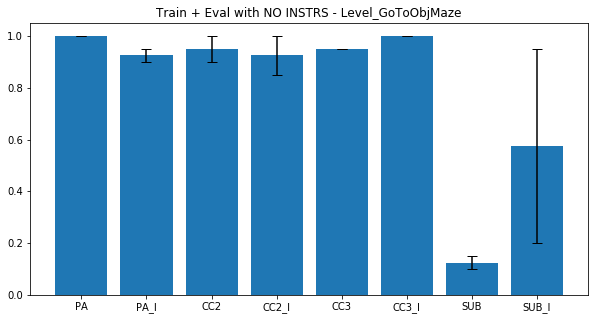

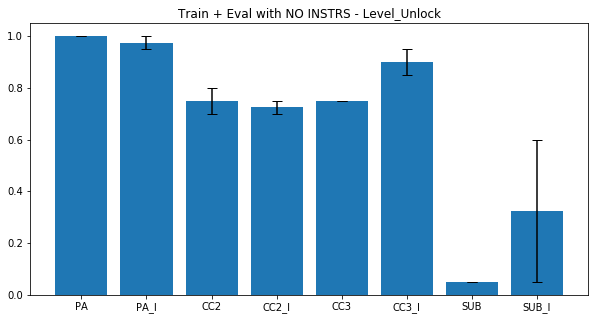

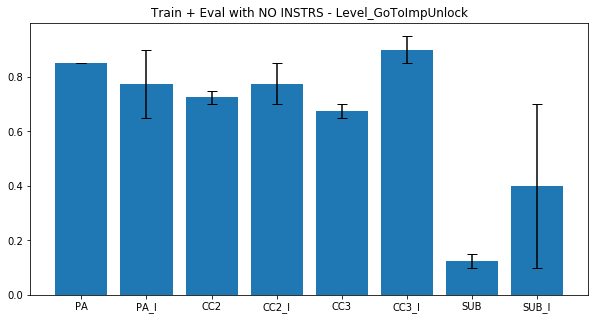

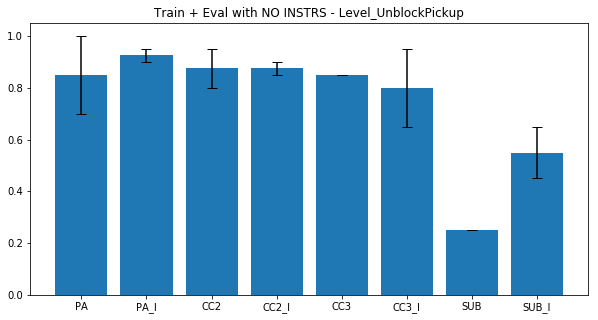

In [220]:

runs = [
    (['EVAL_539', 'EVAL_540'], 'PA'),
    (['EVAL_579', 'EVAL_580'], 'PA_I'),
    (['EVAL_543', 'EVAL_544'], 'CC2'),
    (['EVAL_581', 'EVAL_582'], 'CC2_I'),
    (['EVAL_545', 'EVAL_546'], 'CC3'),
    (['EVAL_597', 'EVAL_598'], 'CC3_I'),
    (['EVAL_547', 'EVAL_548'], 'SUB'),
    (['EVAL_599', 'EVAL_600'], 'SUB_I'),
]

plot_final_generalization(runs, 'Train + Eval with NO INSTRS')

# Claim 3: With the distillation process, we can generalize to performing new tasks without using the reward. This process is more feedback-efficient than just providing rewards.

TODO!

# Claim 4: Lower-level communication is more sample-efficient + feedback-efficient to ground than higher-level.

The goal is to motivate why we want to bootstrap rather than using the higher-level teachers directly.

TODO

This is true from what we've seen so far. We could probably show this in a graph by training an agent (either on the start of the curriculum or on a certain level), and checking periodically whether it can solve the held-out levels. The easy teachers should be able to do this more quickly than the harder teachers.

# Claim 5: Higher level communication is most feedback-efficient on new levels once grounded.

The goal is to motivate why we want higher-level teachers at all.

In theory, the generalization exps (claim 3) should show this.

# Claim 6: We can ground higher-level feedback using lower-level feedback and minimal use of the reward. This is more efficient than grounding the higher-level communication directly.

Goal is to show that bootstrapping is a reasonable thing to do.

May also help with grounding harder teachers better.

TODO

Failures:
    
520 - a bunch of small things, e.g. sometimes gets stuck in room since something blocks the door. Sometimes doesn't pick up the object even when it's really near.

Also, Drollout/Advance is the main bottleneck, but Train/Advance also isn't great. (Success isn't always quite good enough), even though accuracy is pretty good.

## Comparing the Feedback Efficiency of 
### (a) Train on higher-level teacher directly
### (b) Train with easy teacher, distill to higher-level teacher
### (c) Start training on easy teacher, then distill from easy to higher-level teacher, than train with higher-level teacher

In all cases, the agent advances to the next curriculum level when it can perform well on the highest-level teacher currently provided.

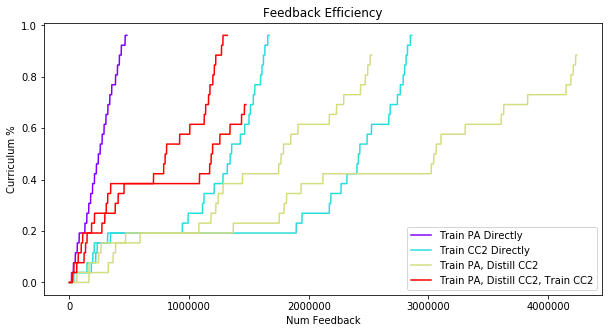

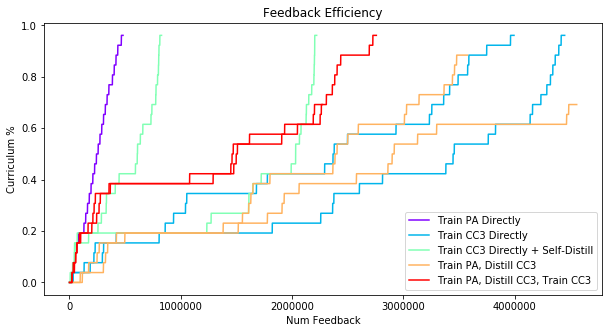

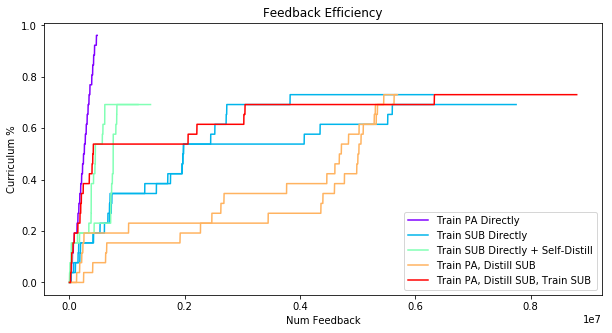

In [342]:
data_names = [
    (['0540'], 'Train PA Directly'),
#     (['0539', '0540'], 'Train PA Directly'),
    (['0543', '0544'], 'Train CC2 Directly'),
    (['0557', '0558'], 'Train PA, Distill CC2'),
    (['637', '638'], 'Train PA, Distill CC2, Train CC2'),
]
plot_curriculum(data_names, 'feedback')

data_names = [
    (['0540'], 'Train PA Directly'),
    (['0545', '0546'], 'Train CC3 Directly'),
    (['682', '683'], 'Train CC3 Directly + Self-Distill'),
    (['0559', '0560'], 'Train PA, Distill CC3'),
    (['639', '640'], 'Train PA, Distill CC3, Train CC3'),
]
plot_curriculum(data_names, 'feedback')

data_names = [
    (['0540'], 'Train PA Directly'),
    (['0547', '0548'], 'Train SUB Directly'),
    (['684', '685'], 'Train SUB Directly + Self-Distill'),
    (['0561', '0562'], 'Train PA, Distill SUB'),
    (['641'], 'Train PA, Distill SUB, Train SUB'),
]
plot_curriculum(data_names, 'feedback')


# Claim 8: we can (largely) remove the reward during training once the first teacher is grounded.

Let's test this by taking PA (the easiest teacher to learn) and seeing at what point during training it can zero-shot solve the entire curriculum.


LEVELS ['latest']


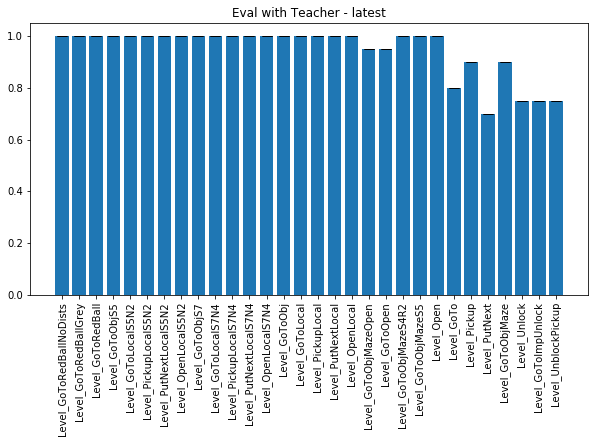

LEVELS ['level_12', 'level_17', 'level_7']


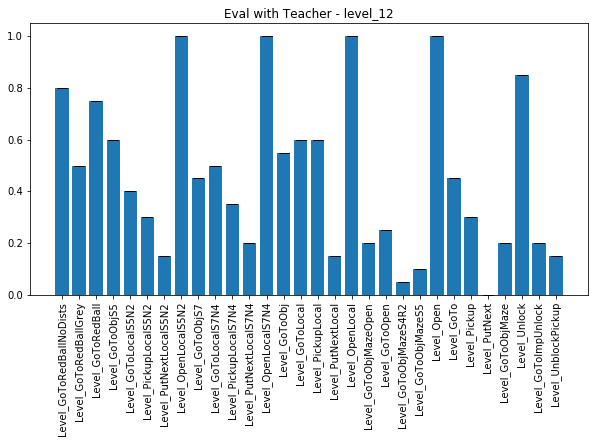

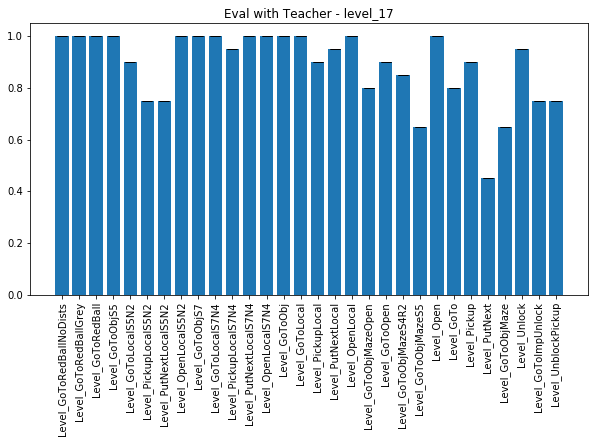

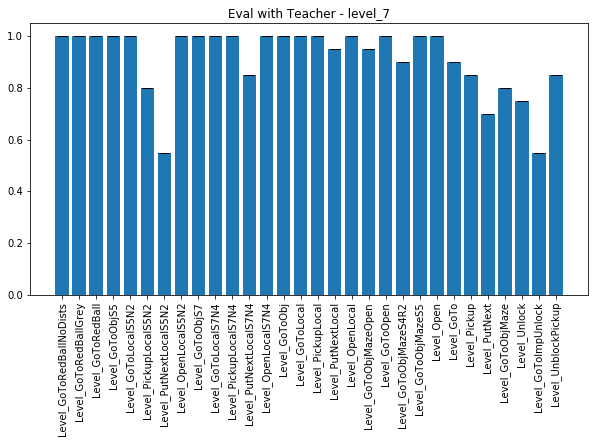

In [244]:
def plot_curriculum_generalization(runs, title):
    for run_names, legend_name in runs:  # Currently plotting each one separately.
        try:
            data = []
            for run_name in run_names:
                data += load_data(run_name, file_name='results.csv')
            levels = sorted(np.unique(data[0]['policy']))
            print("LEVELS", levels)
            for level in levels:
                relevant_data = [df[df['policy'] == level] for df in data]
                x = relevant_data[0][' env']
                y_data = [df['success_rate'].to_numpy() for df in relevant_data]
                y_mean = y_data[0]
                y_err = np.zeros_like(y_mean)
                y_mean = [np.mean([y[i] for y in y_data]) for i in range(len(y_data[0]))]
                y_err = [np.std([y[i] for y in y_data]) for i in range(len(y_data[0]))]
                plt.title(title + ' - ' + level)
                plt.bar(x, y_mean, yerr=y_err, capsize=5)
                plt.xticks(rotation=90)
                plt.show()
        except Exception as e:
            print("Error on ", run_names, e)


runs = [
    (['EVAL_PA_EARLY_FINAL_455'], 'PA'),
    (['EVAL_PA_EARLY_455_mid'], 'PA'),
]
plot_curriculum_generalization(runs, 'Eval with Teacher')

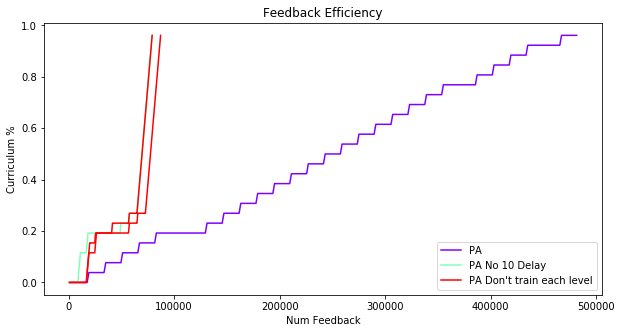

In [293]:
data_names = [
    (['0540'], 'PA'),
    (['676'], 'PA No 10 Delay'),
    (['677', '678'], "PA Don't train each level"),  # TODO: add eval samples into count
]
plot_curriculum(data_names, 'feedback')

# Leaderboard - Curriculum Learning

Keep track of the current best methods of learning a curriculum (ranked by feedback-efficiency).

In [150]:
def plot_leaderboard(methods):
    plot_values = []
    error_bars = []
    plot_names = []
    num_feedback_key = 'Train/NumFeedbackTotal'
    for run_names, legend_name, _ in methods:
        try:
            data = []
            for run_name in run_names:
                data += load_data(run_name)
            if run_name in ['0577', '0578']:  # TODO: delete this later now that we've fixed how we count feedback
                pure_feedback_list = [df['Train/NumFeedbackAdvice'].to_numpy()[-2].item() for df in data]
                reward_list = [df['Train/NumFeedbackReward'].to_numpy()[-2].item() for df in data]
                path_length_list = [df['Train/PathLength'].to_numpy()[-2].item() for df in data]
                success_list = [df['Train/Success'].to_numpy()[-2].item() for df in data]
                num_feedback_list = [pure_feedback + reward_feedback / path_length * success_rate for reward_feedback, path_length, success_rate, pure_feedback in zip(reward_list, path_length_list, success_list, pure_feedback_list)]
            else:
                num_feedback_list = [df[num_feedback_key].to_numpy()[-2].item() for df in data]
            plot_values.append(np.mean(num_feedback_list))
            error_bars.append(np.std(num_feedback_list))
            plot_names.append(f'{run_name} - {legend_name}')
        except Exception as e:
            print(e)
            print("couldn't plot " + legend_name)
    plt.bar(plot_names, plot_values, yerr=error_bars, capsize=5)
    plt.xticks(rotation=45)
    plt.show()

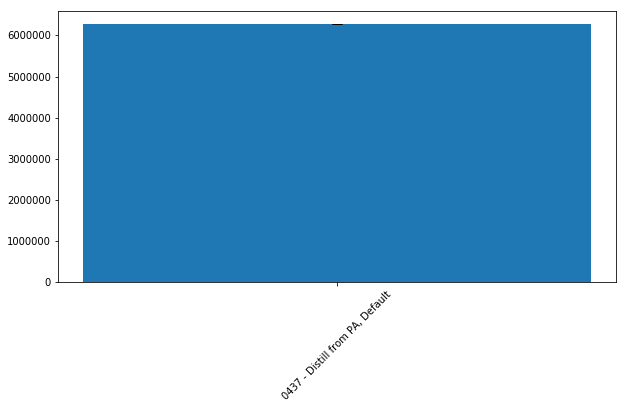

In [152]:
methods = [
    (['0437'], "Distill from PA, Default", "Standard HParams, train PA, distill to powerset"), # TODO: placeholder; hasn't actually succeeded yet
]

plot_leaderboard(methods)


# Leaderboard - Curriculum Learning (no distillation)

Keep track of the current best methods of learning a curriculum (ranked by feedback-efficiency).

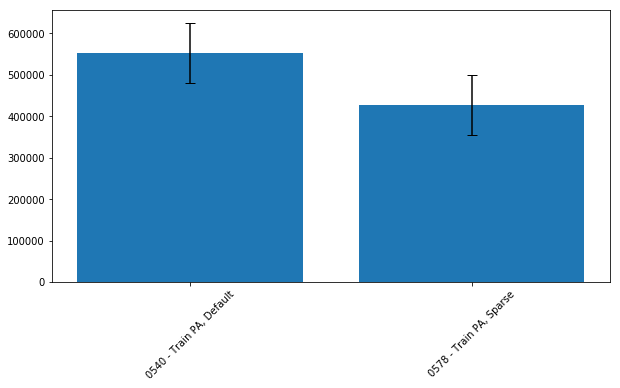

In [151]:
methods = [
    (['0539', '0540'], "Train PA, Default", "Standard HParams, train PA"),
    (['0577', '0578'], "Train PA, Sparse", "Standard HParams, train PA"),
]

plot_leaderboard(methods)


# Leaderboard - Few-Shot Generalization


Keep track of the current best methods of few-shot learning heldout levels (ranked by feedback-efficiency).

TODO

# Miscellaneous Other Plots

## Does bigger batch size help?

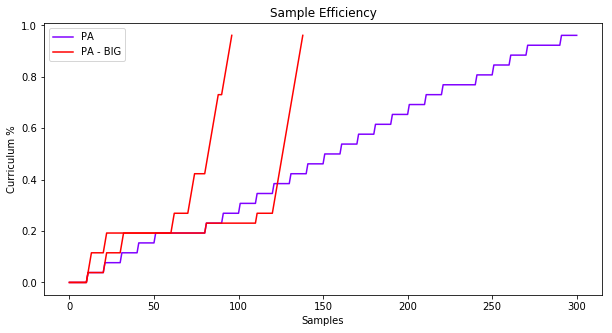

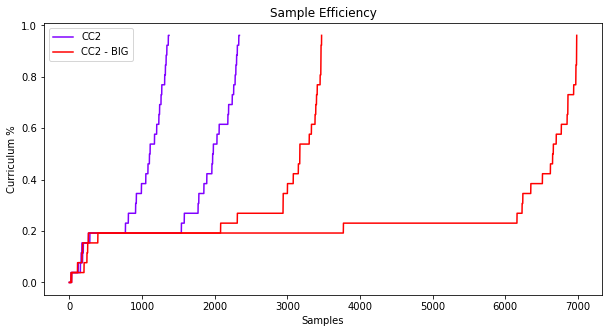

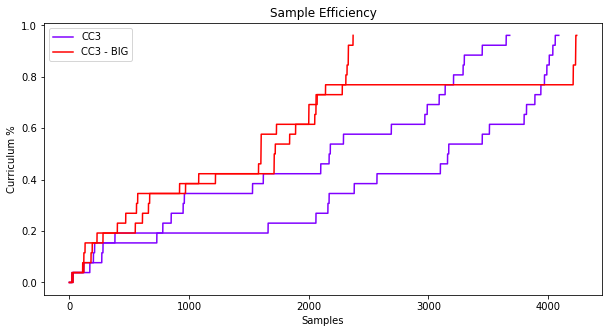

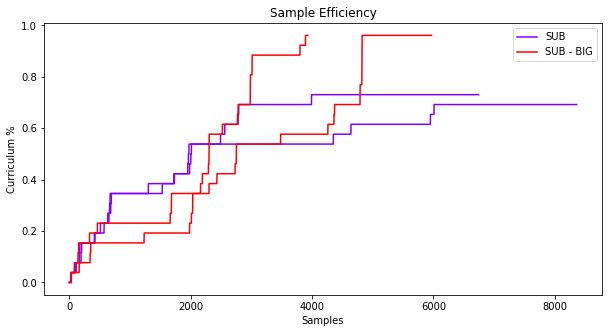

In [348]:
data_names = [
    (['0540'], 'PA'),
    (['692', '693'], 'PA - BIG'),
]
plot_curriculum(data_names, 'samples')  # WORSE

data_names = [
    (['0543', '0544'], 'CC2'),
    (['694', '695'], 'CC2 - BIG'),
]
plot_curriculum(data_names, 'samples')

data_names = [
    (['0545', '0546'], 'CC3'),
    (['696', '697'], 'CC3 - BIG'),
]
plot_curriculum(data_names, 'samples')

data_names = [
    (['0547', '0548'], 'SUB'),
    (['688'], 'SUB - BIG'),
]
plot_curriculum(data_names, 'samples')


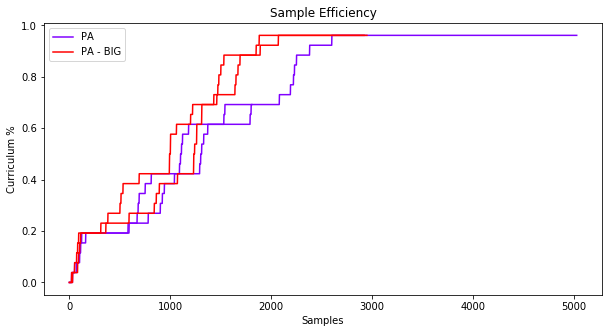

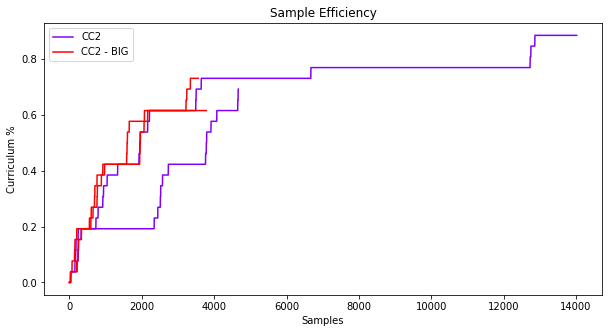

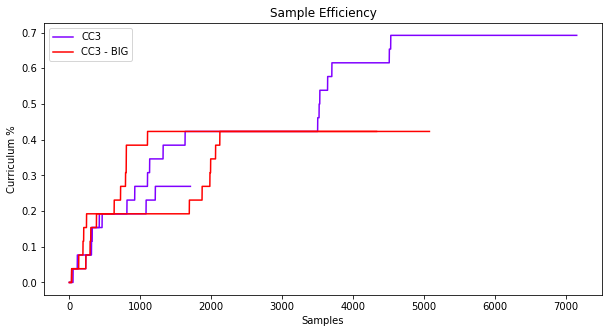

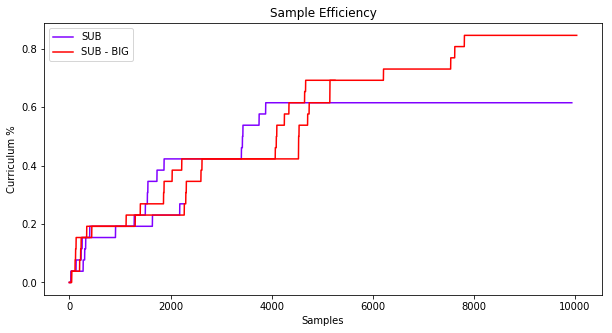

In [353]:
data_names = [  # TODO: re-run these 
    (['0627', '0628'], 'PA'),
    (['698', '699'], 'PA - BIG')
]
plot_curriculum(data_names, 'samples')

data_names = [
    (['0631', '0632'], 'CC2'),
    (['700', '701'], 'CC2 - BIG'),
]
plot_curriculum(data_names, 'samples')

data_names = [
    (['0633', '0634'], 'CC3'),
    (['702', '703'], 'CC3 - BIG')
]
plot_curriculum(data_names, 'samples')

data_names = [
    (['0635', '0636'], 'SUB'),
    (['690'], 'SUB - BIG')
]
plot_curriculum(data_names, 'samples')